# Project: Wrangling and Analyze Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#assessing">Assessing Data</a></li>
<li><a href="#cleaning">Cleaning Data</a></li>
<li><a href="#storing">Storing Data</a></li>
<li><a href="#analyzing">Analyzing and Visualizing Data</a></li>
</ul>

In [83]:
#Importing necessary libraries
import os
import io
import time
import json
import tweepy
import requests
import numpy as np
import pandas as pd
import matplotlib.figure
import matplotlib.pyplot as plt
from tweepy import OAuthHandler
#from dotenv import load_dotenv

%matplotlib inline

<a id="intro"></a>
## Introduction

This project is about **analyzing** the tweet archive of Twitter user @dog_rates, also known as WeRateDogs.This  Twitter account rates people's dogs with a humorous comment about the dog and it has over 4 million followers and has received international media coverage. The twitter archive does not have all the necessary data and we will **gather** missing data from twitter using an API, **assess** the quality and tidiness of data, we will also **clean** the dirty data, **store** the cleaning data in a new dataframe and finally **visualize** our findings.   



<a id="gathering"></a>
## Data Gathering

In [84]:
# Loading Twitter API data and displaying five rows
twitter_json = pd.read_json('tweet_json.txt')
#twitter_json['tweet_id'] = tweet_success
#twitter_json = twitter_json[['tweet_id', 'favorite_count', 'retweet_count']]
twitter_json.head(5)

ValueError: Trailing data

In [2]:
# Load Twitter data of dog rate
df=pd.read_csv('twitter-archive-enhanced.csv')
df.head(3)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None  
1                  10    Tilly  None    None   None  None  
2                  10   Archie  None    None   None  None

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [4]:
dfa="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
dfb=requests.get(dfa).content
df1=pd.read_csv(io.StringIO(dfb.decode("utf-8")), sep="\t")
df1.head(3)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [6]:
# Load Twitter json data
data = pd.read_json('tweet_json.txt', lines=True)
data.head(3)

created_at                  id              id_str  \
0 2017-08-01 16:23:56+00:00  892420643555336193  892420643555336192   
1 2017-08-01 00:17:27+00:00  892177421306343426  892177421306343424   
2 2017-07-31 00:18:03+00:00  891815181378084864  891815181378084864   

                                           full_text  truncated  \
0  This is Phineas. He's a mystical boy. Only eve...      False   
1  This is Tilly. She's just checking pup on you....      False   
2  This is Archie. He is a rare Norwegian Pouncin...      False   

  display_text_range                                           entities  \
0            [0, 85]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1           [0, 138]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2           [0, 121]  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                   extended_entities  \
0  {'media': [{'id': 892420639486877696, 'id_str'...   
1  {'media': [{'id': 892177413194625024, 'id_str'...   
2  {'media': [{'id': 891815175371796480, 'id_str'...   

                                              source  in_reply_to_status_id  \
0  <a href="http://twitter.com/download/iphone" r...                    NaN   
1  <a href="http://twitter.com/download/iphone" r...                    NaN   
2  <a href="http://twitter.com/download/iphone" r...                    NaN   

   ...  favorite_count  favorited  retweeted possibly_sensitive  \
0  ...           39467      False      False                0.0   
1  ...           33819      False      False                0.0   
2  ...           25461      False      False                0.0   

  possibly_sensitive_appealable  lang  retweeted_status quoted_status_id  \
0                           0.0    en               NaN              NaN   
1                           0.0    en               NaN              NaN   
2                           0.0    en               NaN              NaN   

   quoted_status_id_str  quoted_status  
0                   NaN            NaN  
1                   NaN            NaN  
2                   NaN            NaN  

[3 rows x 31 columns]

In [7]:
# export to csv
data.to_csv('tweet_json.csv')

In [8]:
# Import as csv
data1=pd.read_csv('tweet_json.csv')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     2354 non-null   int64  
 1   created_at                     2354 non-null   object 
 2   id                             2354 non-null   int64  
 3   id_str                         2354 non-null   int64  
 4   full_text                      2354 non-null   object 
 5   truncated                      2354 non-null   bool   
 6   display_text_range             2354 non-null   object 
 7   entities                       2354 non-null   object 
 8   extended_entities              2073 non-null   object 
 9   source                         2354 non-null   object 
 10  in_reply_to_status_id          78 non-null     float64
 11  in_reply_to_status_id_str      78 non-null     float64
 12  in_reply_to_user_id            78 non-null     f

Tweet data from json file has a lot of variables which contain missing values, so the one with a high rate of empty columns have to be dropped from the data set.

In [9]:
# Dropping columns with a lot of missing values
data2 = klib.data_cleaning(data1)

Long column names detected (>25 characters). Consider renaming the following columns ['possibly_sensitive_appealable'].
Shape of cleaned data: (2354, 17)Remaining NAs: 567

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 15
     of which 2 single valued.     Columns: ['truncated', 'retweeted']
Dropped missing values: 29946
Reduced memory by at least: 0.31 MB (-60.78%)



In [10]:
data2.head(3)

unnamed_0                 created_at                  id  \
0          0  2017-08-01 16:23:56+00:00  892420643555336193   
1          1  2017-08-01 00:17:27+00:00  892177421306343426   
2          2  2017-07-31 00:18:03+00:00  891815181378084864   

               id_str                                          full_text  \
0  892420643555336192  This is Phineas. He's a mystical boy. Only eve...   
1  892177421306343424  This is Tilly. She's just checking pup on you....   
2  891815181378084864  This is Archie. He is a rare Norwegian Pouncin...   

  display_text_range                                           entities  \
0            [0, 85]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1           [0, 138]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2           [0, 121]  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                   extended_entities  \
0  {'media': [{'id': 892420639486877696, 'id_str'...   
1  {'media': [{'id': 892177413194625024, 'id_str'...   
2  {'media': [{'id': 891815175371796480, 'id_str'...   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   

                                                user  is_quote_status  \
0  {'id': 4196983835, 'id_str': '4196983835', 'na...            False   
1  {'id': 4196983835, 'id_str': '4196983835', 'na...            False   
2  {'id': 4196983835, 'id_str': '4196983835', 'na...            False   

   retweet_count  favorite_count  favorited  possibly_sensitive  \
0           8853           39467      False                 0.0   
1           6514           33819      False                 0.0   
2           4328           25461      False                 0.0   

   possibly_sensitive_appealable lang  
0                            0.0   en  
1                            0.0   en  
2                            0.0   en

In [11]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   unnamed_0                      2354 non-null   int16   
 1   created_at                     2354 non-null   string  
 2   id                             2354 non-null   int64   
 3   id_str                         2354 non-null   int64   
 4   full_text                      2354 non-null   string  
 5   display_text_range             2354 non-null   string  
 6   entities                       2354 non-null   string  
 7   extended_entities              2073 non-null   string  
 8   source                         2354 non-null   category
 9   user                           2354 non-null   string  
 10  is_quote_status                2354 non-null   boolean 
 11  retweet_count                  2354 non-null   int32   
 12  favorite_count                 235

In [12]:
# Removing the unnecessary variables
data2.drop(["unnamed_0","created_at","id_str","full_text","display_text_range","entities","extended_entities","source","user",
         "is_quote_status","favorited","possibly_sensitive","possibly_sensitive_appealable","lang"], axis = 1, inplace = True)

In [13]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int32
 2   favorite_count  2354 non-null   int32
dtypes: int32(2), int64(1)
memory usage: 36.9 KB


# Data quality contral
In above part columns of the data sets with a lot of empty cell were dropped. In this part, the data wrangling will be done to check the quality and tidness.

## Twitter archive data

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Define: 
Column with a lot of missing values needs to be dropped from the data

### Code

In [15]:
# Dropping columns with a lot of missing values
df = klib.data_cleaning(df)

Shape of cleaned data: (2356, 12)Remaining NAs: 59

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 5
     of which 0 single valued.     Columns: []
Dropped missing values: 11081
Reduced memory by at least: 0.2 MB (-64.52%)



##### Checking rows with missing values

In [16]:
#  Checking if there are some missing values in data.
df.expanded_urls.isnull().sum()

59

### Test

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2356 non-null   int64   
 1   timestamp           2356 non-null   string  
 2   source              2356 non-null   category
 3   text                2356 non-null   string  
 4   expanded_urls       2297 non-null   string  
 5   rating_numerator    2356 non-null   int16   
 6   rating_denominator  2356 non-null   int16   
 7   name                2356 non-null   string  
 8   doggo               2356 non-null   category
 9   floofer             2356 non-null   category
 10  pupper              2356 non-null   category
 11  puppo               2356 non-null   category
dtypes: category(5), int16(2), int64(1), string(4)
memory usage: 113.5 KB


##### Checking duplicated rows

In [18]:
#Checking if there are some diuplicated rows;
sum(df.duplicated())

0

##### Observe data

In [19]:
#Summary statistics of numerical attributes in the dataframe.
df.describe()

tweet_id  rating_numerator  rating_denominator
count  2.356000e+03       2356.000000         2356.000000
mean   7.427716e+17         13.126486           10.455433
std    6.856705e+16         45.876648            6.745237
min    6.660209e+17          0.000000            0.000000
25%    6.783989e+17         10.000000           10.000000
50%    7.196279e+17         11.000000           10.000000
75%    7.993373e+17         12.000000           10.000000
max    8.924206e+17       1776.000000          170.000000

##### Checking for column values

In [20]:
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

## Image predictions data

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


##### Checking missing values

In [22]:
#  Checking if there are some missing values in data.
df1.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

##### Checking duplicate

In [23]:
sum(df1.duplicated())

0

##### Observe the data

In [24]:
#Summary statistics of numerical attributes in the dataframe.
df1.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

tweet_id should be in object format, since the summary statistics of id has no meaning.

In [25]:
df1.head(5)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

## Json file

##### Column format

In [26]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int32
 2   favorite_count  2354 non-null   int32
dtypes: int32(2), int64(1)
memory usage: 36.9 KB


tweet_id should be in object format, since the summary statistics of id has no meaning.

## Identified issues

### Quality
0. Removing columns with a lot of missing values.
1. tweet_id should be in object format, since the summary statistics of id has no meaning.
2. From the archived twitter data, expanded_urls has 59 missing values, this issue can be fixed by dropping them. 
3. There is duplicate values from this data set.
4. The variable timestamp is an object but it was supposed in time format.
5. rating_numerator and rating_denominator have outliers as 1776 and 170 are the maximum values respectively.
6. In rating_denominator first, second, and third quatiles are equal, which implies that 10 appear more frequentily.
7. Both rating_numerator and rating_denominator should be in float format rather than int.
8. Source column values were supposed to be iPhone, Vine, Web, and Tweetdesk instead of link format.
9. Removing RT from Text column.

### Tidy
- In Twitter archive data, there four columns (doggo, floofer, pupper, and puppo) for single variable
- In Twitter archive data, column rating_denomitor has 10 as rating factor in majority, therefore the column has no real meaing.
- In Image prediction data, columns p1, p2, and p3 were supposed to be one single variable.
- All three datasets were supposed to one combined data set.

# Cleaning

In [27]:
dfc = df.copy()
df1c = df1.copy()
data2c = data2.copy()

#####  dropping rows with missing values

In [28]:
# Removing missing values
dfc.dropna(inplace=True)

### Issue 1
#### Define
converting timestamp to date format

#### Code

In [29]:
dfc['timestamp'] = pd.to_datetime(dfc['timestamp'])

In [30]:
dfc['timestamp'] = dfc['timestamp'].dt.strftime('%Y-%m-%d')

#### Test

In [31]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2297 non-null   int64   
 1   timestamp           2297 non-null   object  
 2   source              2297 non-null   category
 3   text                2297 non-null   string  
 4   expanded_urls       2297 non-null   string  
 5   rating_numerator    2297 non-null   int16   
 6   rating_denominator  2297 non-null   int16   
 7   name                2297 non-null   string  
 8   doggo               2297 non-null   category
 9   floofer             2297 non-null   category
 10  pupper              2297 non-null   category
 11  puppo               2297 non-null   category
dtypes: category(5), int16(2), int64(1), object(1), string(3)
memory usage: 128.5+ KB


### Issue 2:
#### Define
changing source values

#### Code

In [32]:
# removing link from source column
dfc['source'] = dfc['source'].str.extract('^<a.+>(.+)</a>$')

#### Test

In [33]:
dfc.source.value_counts()

Twitter for iPhone     2163
Vine - Make a Scene      91
Twitter Web Client       32
TweetDeck                11
Name: source, dtype: int64

### Issue 3:
#### Define
converting rating numerator and denominator into float

#### Code

In [34]:
# Converting int to float
dfc['rating_numerator'] = dfc['rating_numerator'].astype(float)
dfc['rating_denominator'] = dfc['rating_denominator'].astype(float)

#### Test

In [35]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2297 non-null   int64   
 1   timestamp           2297 non-null   object  
 2   source              2297 non-null   object  
 3   text                2297 non-null   string  
 4   expanded_urls       2297 non-null   string  
 5   rating_numerator    2297 non-null   float64 
 6   rating_denominator  2297 non-null   float64 
 7   name                2297 non-null   string  
 8   doggo               2297 non-null   category
 9   floofer             2297 non-null   category
 10  pupper              2297 non-null   category
 11  puppo               2297 non-null   category
dtypes: category(4), float64(2), int64(1), object(2), string(3)
memory usage: 171.0+ KB


### Image predictions

In [36]:
df1c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Json

In [37]:
data2c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int32
 2   favorite_count  2354 non-null   int32
dtypes: int32(2), int64(1)
memory usage: 36.9 KB


In [38]:
# Rename the variable
data2c = data2c.rename(columns = {'id' : 'tweet_id'})

## Merging data sets 
All three datasets share a common key identify which tweet_id

In [39]:
new = pd.merge(dfc, data2c, on = 'tweet_id', how = 'left')

In [40]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2296
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2297 non-null   int64   
 1   timestamp           2297 non-null   object  
 2   source              2297 non-null   object  
 3   text                2297 non-null   string  
 4   expanded_urls       2297 non-null   string  
 5   rating_numerator    2297 non-null   float64 
 6   rating_denominator  2297 non-null   float64 
 7   name                2297 non-null   string  
 8   doggo               2297 non-null   category
 9   floofer             2297 non-null   category
 10  pupper              2297 non-null   category
 11  puppo               2297 non-null   category
 12  retweet_count       2295 non-null   float64 
 13  favorite_count      2295 non-null   float64 
dtypes: category(4), float64(4), int64(1), object(2), string(3)
memory usage: 206.9+ KB


Combined dataset has missing values which needs to be removed. Also, after merging the data retweet_count and favorite_count changed from int to float.

### Issue 4:
#### Define
drop missing values

#### Code

In [41]:
# Removing missing values
new.dropna(inplace=True)

#### Test

In [42]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2295 entries, 0 to 2296
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2295 non-null   int64   
 1   timestamp           2295 non-null   object  
 2   source              2295 non-null   object  
 3   text                2295 non-null   string  
 4   expanded_urls       2295 non-null   string  
 5   rating_numerator    2295 non-null   float64 
 6   rating_denominator  2295 non-null   float64 
 7   name                2295 non-null   string  
 8   doggo               2295 non-null   category
 9   floofer             2295 non-null   category
 10  pupper              2295 non-null   category
 11  puppo               2295 non-null   category
 12  retweet_count       2295 non-null   float64 
 13  favorite_count      2295 non-null   float64 
dtypes: category(4), float64(4), int64(1), object(2), string(3)
memory usage: 206.7+ KB


### Issue 5:
#### Define
converting retweet and favorite into integer

#### Code

In [43]:
# recast the count columns to int type
new.retweet_count = new.retweet_count.astype(int)
new.favorite_count = new.favorite_count.astype(int)

#### Test

In [44]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2295 entries, 0 to 2296
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2295 non-null   int64   
 1   timestamp           2295 non-null   object  
 2   source              2295 non-null   object  
 3   text                2295 non-null   string  
 4   expanded_urls       2295 non-null   string  
 5   rating_numerator    2295 non-null   float64 
 6   rating_denominator  2295 non-null   float64 
 7   name                2295 non-null   string  
 8   doggo               2295 non-null   category
 9   floofer             2295 non-null   category
 10  pupper              2295 non-null   category
 11  puppo               2295 non-null   category
 12  retweet_count       2295 non-null   int32   
 13  favorite_count      2295 non-null   int32   
dtypes: category(4), float64(2), int32(2), int64(1), object(2), string(3)
memory usage: 188.7

#### Merging

In [45]:
new1 = pd.merge(new, df1c, on = 'tweet_id', how = 'inner')

#### saving data

In [46]:
new1.to_csv('twitter_archive_master.csv')

In [47]:
new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2073 non-null   int64   
 1   timestamp           2073 non-null   object  
 2   source              2073 non-null   object  
 3   text                2073 non-null   string  
 4   expanded_urls       2073 non-null   string  
 5   rating_numerator    2073 non-null   float64 
 6   rating_denominator  2073 non-null   float64 
 7   name                2073 non-null   string  
 8   doggo               2073 non-null   category
 9   floofer             2073 non-null   category
 10  pupper              2073 non-null   category
 11  puppo               2073 non-null   category
 12  retweet_count       2073 non-null   int32   
 13  favorite_count      2073 non-null   int32   
 14  jpg_url             2073 non-null   object  
 15  img_num             2073 non-null   in

In [48]:
new1.p2_dog.value_counts()

True     1552
False     521
Name: p2_dog, dtype: int64

### Issue 6:
#### Define
Combine p1, p2, p3 into one variable and p1_conf, p2_conf, and p3_conf into one single variable 

#### Code

In [49]:
# Combining p1, p2, and p3
new1['p'] = np.where((new1['p1_dog']==True) & (new1['p2_dog']==True) & (new1['p3_dog']==True), new1['p1'],'None')
new1['p'] = np.where((new1['p']=='None') & (new1['p1_dog']==False) & (new1['p2_dog']==True) | (new1['p3_dog']==True), new1['p2'],new1['p'])
new1['p'] = np.where((new1['p']=='None') & (new1['p1_dog']==False) & (new1['p2_dog']==False) & (new1['p3_dog']==True), new1['p3'],new1['p'])
new1['p'] = np.where((new1['p']=='None') & (new1['p1_dog']==False) & (new1['p2_dog']==True) & (new1['p3_dog']==False), new1['p2'],new1['p'])
new1['p'] = np.where((new1['p']=='None') & (new1['p1_dog']==True) & (new1['p2_dog']==True) & (new1['p3_dog']==False), new1['p1'],new1['p'])
new1['p'] = np.where((new1['p']=='None') & (new1['p1_dog']==True) & (new1['p2_dog']==False) & (new1['p3_dog']==False), new1['p1'],new1['p'])
new1['p'] = np.where((new1['p']!='None') &(new1['p1_dog']==False) & (new1['p2_dog']==False) & (new1['p3_dog']==False), 'None',new1['p'])

In [50]:
# Combining p1_conf, p2_conf, and p3_conf
new1['conf'] = np.where((new1['p1_dog']==True) & (new1['p2_dog']==True) & (new1['p3_dog']==True), new1['p1_conf'],0)
new1['conf'] = np.where((new1['conf']=='None') & (new1['p1_dog']==False) & (new1['p2_dog']==True) | (new1['p3_dog']==True), new1['p2_conf'],new1['conf'])
new1['conf'] = np.where((new1['conf']=='None') & (new1['p1_dog']==False) & (new1['p2_dog']==False) & (new1['p3_dog']==True), new1['p3_conf'],new1['conf'])
new1['conf'] = np.where((new1['conf']=='None') & (new1['p1_dog']==False) & (new1['p2_dog']==True) & (new1['p3_dog']==False), new1['p2_conf'],new1['conf'])
new1['conf'] = np.where((new1['conf']=='None') & (new1['p1_dog']==True) & (new1['p2_dog']==True) & (new1['p3_dog']==False), new1['p1_conf'],new1['conf'])
new1['conf'] = np.where((new1['conf']=='None') & (new1['p1_dog']==True) & (new1['p2_dog']==False) & (new1['p3_dog']==False), new1['p1_conf'],new1['conf'])
new1['conf'] = np.where((new1['conf']!='None') &(new1['p1_dog']==False) & (new1['p2_dog']==False) & (new1['p3_dog']==False), 0,new1['conf'])

In [51]:
# dropping p1_conf, p2_conf, p3_conf, p1, p2, and p3 and also, drop rating_denominator, since it is constant
new1.drop(['p1_conf', 'p2_conf', 'p3_conf', 'p1', 'p2', 'p3','p1_dog','p2_dog','p3_dog'], 
          axis = 1, inplace = True)

#### Test

In [52]:
new1.head()

tweet_id   timestamp              source  \
0  892420643555336193  2017-08-01  Twitter for iPhone   
1  892177421306343426  2017-08-01  Twitter for iPhone   
2  891815181378084864  2017-07-31  Twitter for iPhone   
3  891689557279858688  2017-07-30  Twitter for iPhone   
4  891327558926688256  2017-07-29  Twitter for iPhone   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...              13.0   
1  https://twitter.com/dog_rates/status/892177421...              13.0   
2  https://twitter.com/dog_rates/status/891815181...              12.0   
3  https://twitter.com/dog_rates/status/891689557...              13.0   
4  https://twitter.com/dog_rates/status/891327558...              12.0   

   rating_denominator      name doggo floofer pupper puppo  retweet_count  \
0                10.0   Phineas  None    None   None  None           8853   
1                10.0     Tilly  None    None   None  None           6514   
2                10.0    Archie  None    None   None  None           4328   
3                10.0     Darla  None    None   None  None           8964   
4                10.0  Franklin  None    None   None  None           9774   

   favorite_count                                          jpg_url  img_num  \
0           39467  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg        1   
1           33819  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg        1   
2           25461  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg        1   
3           42908  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg        1   
4           41048  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg        2   

                    p      conf  
0                None  0.000000  
1            Pekinese  0.090647  
2            malamute  0.078253  
3  Labrador_retriever  0.000000  
4    English_springer  0.225770

### Issue 7:
#### Define
Combining four dag stage columns into one single variable

#### Code

In [53]:
col=['doggo','floofer','pupper','puppo']

new1[col] = new1[col].replace('None', '')

# Then combine stage columns.
#new1['stage'] = new1.doggo + new1.floofer + new1.pupper + new1.puppo
new1['stage'] = new1[['doggo', 'floofer', 'pupper', 'puppo']].stack().groupby(level=0).agg(''.join)

# Then format entries with multiple dog stages which appeared like doggopupper.

new1.loc[new1.stage == 'doggopupper', 'stage'] = 'doggo,pupper' 
new1.loc[new1.stage == 'doggopuppo', 'stage'] = 'doggo,puppo' 
new1.loc[new1.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'
# Drop the original (four) columns
new1.drop(columns=col, inplace=True)

#### Test

In [54]:
new1.stage.value_counts()

                 1753
pupper            210
doggo              67
puppo              23
doggo,pupper       11
floofer             7
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

### Issue 8:
#### Define
changing the tweet id to object format

#### Code

In [55]:
new1['tweet_id'] = dfc['tweet_id'].apply(str)

#### Test

In [56]:
new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2017 non-null   object 
 1   timestamp           2073 non-null   object 
 2   source              2073 non-null   object 
 3   text                2073 non-null   string 
 4   expanded_urls       2073 non-null   string 
 5   rating_numerator    2073 non-null   float64
 6   rating_denominator  2073 non-null   float64
 7   name                2073 non-null   string 
 8   retweet_count       2073 non-null   int32  
 9   favorite_count      2073 non-null   int32  
 10  jpg_url             2073 non-null   object 
 11  img_num             2073 non-null   int64  
 12  p                   2073 non-null   object 
 13  conf                2073 non-null   float64
 14  stage               2073 non-null   object 
dtypes: float64(3), int32(2), int64(1), object(6), string(3)

### Issue 9:
#### Define
Removing outliers form Rating numerator

#### Code

In [57]:
# removing age abova 90.
new1 = new1.drop(new1[new1.rating_numerator>15].index)

#### Test

In [58]:
new1.rating_numerator.value_counts().sort_index()

0.0       2
1.0       5
2.0       9
3.0      19
4.0      16
5.0      34
6.0      32
7.0      52
8.0      95
9.0     151
10.0    429
11.0    413
12.0    473
13.0    283
14.0     40
15.0      1
Name: rating_numerator, dtype: int64

### Issue 10:
#### Define
- removing RT from text column

#### Code

In [59]:
#Extract text with RT
RT = new1[new1['text'].str.contains("RT")].index
#drop RT in  text
new1.drop(RT, inplace = True)

#### Test

In [60]:
new1[new1['text'].str.contains("RT")]

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, retweet_count, favorite_count, jpg_url, img_num, p, conf, stage]
Index: []

# Visualization and analysis

In [61]:
# Rename the variables
new1=new1.rename(columns = {'rating_numerator' : 'Rate'})
new1=new1.rename(columns = {'stage' : 'dogt'})

In [62]:
new1.describe()

Rate  rating_denominator  retweet_count  favorite_count  \
count  1967.000000         1967.000000    1967.000000     1967.000000   
mean     10.536858           10.002034    2762.407728     8905.041179   
std       2.203424            0.290571    4658.478331    12214.387423   
min       0.000000            2.000000      16.000000       81.000000   
25%      10.000000           10.000000     621.500000     1956.500000   
50%      11.000000           10.000000    1350.000000     4138.000000   
75%      12.000000           10.000000    3222.000000    11347.500000   
max      14.000000           20.000000   79515.000000   132810.000000   

           img_num         conf  
count  1967.000000  1967.000000  
mean      1.204372     0.100680  
std       0.563308     0.106752  
min       1.000000     0.000000  
25%       1.000000     0.000000  
50%       1.000000     0.072763  
75%       1.000000     0.170474  
max       4.000000     0.467678

In [63]:
new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 2072
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1913 non-null   object 
 1   timestamp           1967 non-null   object 
 2   source              1967 non-null   object 
 3   text                1967 non-null   string 
 4   expanded_urls       1967 non-null   string 
 5   Rate                1967 non-null   float64
 6   rating_denominator  1967 non-null   float64
 7   name                1967 non-null   string 
 8   retweet_count       1967 non-null   int32  
 9   favorite_count      1967 non-null   int32  
 10  jpg_url             1967 non-null   object 
 11  img_num             1967 non-null   int64  
 12  p                   1967 non-null   object 
 13  conf                1967 non-null   float64
 14  dogt                1967 non-null   object 
dtypes: float64(3), int32(2), int64(1), object(6), string(3)

##### Data distribution of numerical variables

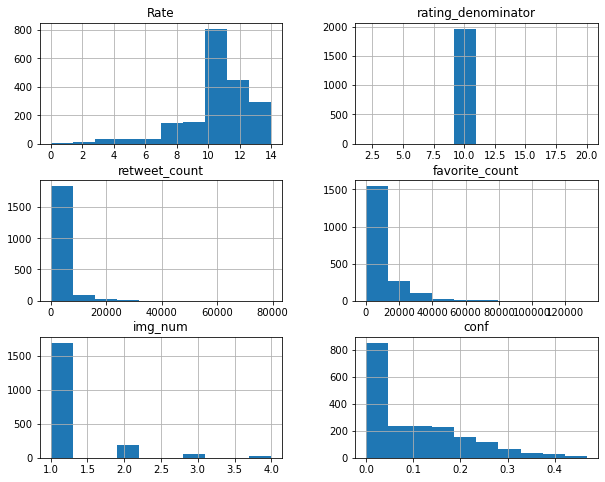

In [64]:
# Distribution of the variables
new1.hist(figsize=(10,8));

 Rate variable distribution is left skewed, rating denominator seems to be constant, while retweet count, favorite count, and confidence distribution is right skewed.

In [65]:
new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 2072
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1913 non-null   object 
 1   timestamp           1967 non-null   object 
 2   source              1967 non-null   object 
 3   text                1967 non-null   string 
 4   expanded_urls       1967 non-null   string 
 5   Rate                1967 non-null   float64
 6   rating_denominator  1967 non-null   float64
 7   name                1967 non-null   string 
 8   retweet_count       1967 non-null   int32  
 9   favorite_count      1967 non-null   int32  
 10  jpg_url             1967 non-null   object 
 11  img_num             1967 non-null   int64  
 12  p                   1967 non-null   object 
 13  conf                1967 non-null   float64
 14  dogt                1967 non-null   object 
dtypes: float64(3), int32(2), int64(1), object(6), string(3)

##### Distribution plot

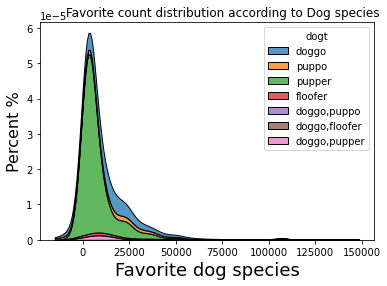

In [66]:
new2 = new1.drop(new1[new1.dogt==''].index)# subsetting dogt
sns.kdeplot(data=new2, x='favorite_count',hue='dogt',multiple='stack')
plt.xlabel("Favorite dog species", fontsize=18)
plt.ylabel('Percent %', fontsize=16)
plt.title('        Favorite count distribution according to Dog species', fontsize=12);

#####  Mean by group

In [67]:
new2.groupby('dogt')['favorite_count'].mean()

dogt
doggo            19356.380952
doggo,floofer    17169.000000
doggo,pupper     12533.111111
doggo,puppo      47844.000000
floofer          13206.000000
pupper            7226.089552
puppo            21582.090909
Name: favorite_count, dtype: float64

The distribution of favorite count according to dog species differ and floofer has lowest frequency compared to other dog species. Also, the mean differ in all categories of the dog.

##### Distribution plot

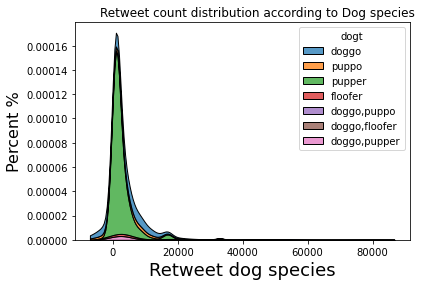

In [68]:
new2 = new1.drop(new1[new1.dogt==''].index)# subsetting dogt
sns.kdeplot(data=new2, x='retweet_count',hue='dogt',multiple='stack')
plt.xlabel("Retweet dog species", fontsize=18)
plt.ylabel('Percent %', fontsize=16)
plt.title('        Retweet count distribution according to Dog species', fontsize=12);

##### Mean by group

In [69]:
new2.groupby('dogt')['retweet_count'].mean()

dogt
doggo             7125.698413
doggo,floofer     3433.000000
doggo,pupper      4083.444444
doggo,puppo      19196.000000
floofer           4968.714286
pupper            2375.024876
puppo             6473.954545
Name: retweet_count, dtype: float64

Similarly, Retweet has approximatily the same distribution as favorite count. Also, the mean among dog species were different.

##### Trend plot

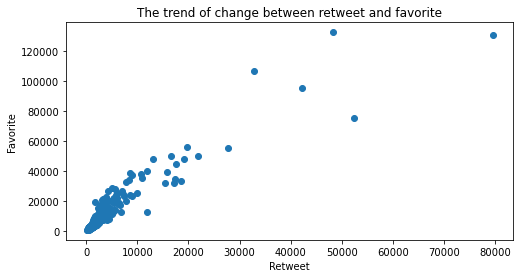

In [70]:
plt.figure(figsize=(8, 4))
plt.scatter(x = new2['retweet_count'], y = new2['favorite_count'])
plt.title('The trend of change between retweet and favorite')
plt.xlabel('Retweet')
plt.ylabel('Favorite');

According to the scatter plot, it is shown that retweet and favorite are positively related due to the trend.

##### Distribution plot

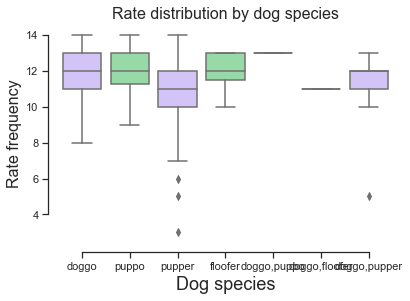

In [71]:
# Draw a boxplot to show rate distribution by dog species
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="dogt", y="Rate",
             palette=["m", "g"],
            data=new2)
sns.despine(offset=10, trim=True)
plt.xlabel("Dog species", fontsize=18)
plt.ylabel('Rate frequency', fontsize=16)
plt.title('Rate distribution by dog species', fontsize=16);

As rating is done by personal and there are multiple choise due to that there are some outliers in data, which affect the distribution of rate variable.

It is shown that of the confidence is not normal distribution as there are many outliers. 

##### Distribution plot

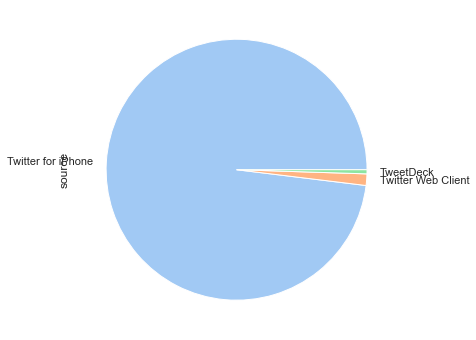

In [72]:
new1.source.value_counts().plot(kind = 'pie', figsize = (8,6));

The distribution of source of tweet indicate that, more dog rate are done using iPhone.

In [73]:
# Defining the function of plot bar chart
def mp(df,xvar,yvar,huevar):
    g = sns.catplot(
    data=df, kind="bar",
    x=xvar, y=yvar, hue=huevar,
    ci="sd", palette="dark", alpha=.6)
    
    g.despine(left=True)
    xvar=xvar.replace("_","")
    yvar=yvar.replace("_","")
    huevar=huevar.replace("_","")
    
    g.set_axis_labels(xvar, f"mean of {yvar}".title())
    g.legend.set_title(huevar)
    g.fig.set_size_inches(10,6);
    plt.title(f'mean of {yvar} by {xvar} and {huevar}'.title(),weight="bold")

In [74]:
# Cross tabulation
pd.crosstab(index=new2['dogt'], columns=new2['source'])

source         TweetDeck  Twitter Web Client  Twitter for iPhone
dogt                                                            
doggo                  1                   0                  62
doggo,floofer          0                   0                   1
doggo,pupper           0                   0                   9
doggo,puppo            0                   0                   1
floofer                0                   0                   7
pupper                 1                   1                 199
puppo                  0                   0                  22

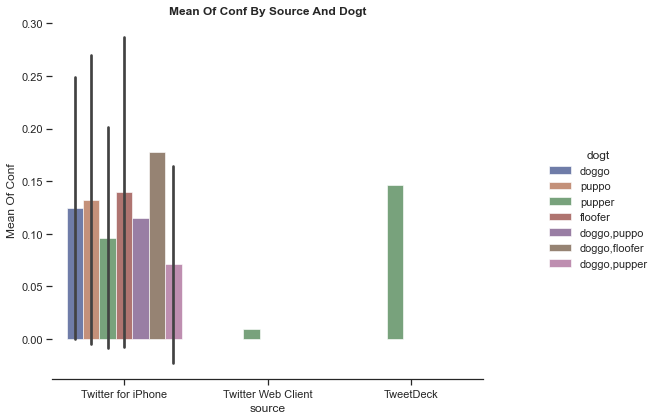

In [75]:
# Draw a nested barplot by SMS_received and Gender
mp(new2,'source','conf','dogt')

In majority the dog rate is done using phone (iPhone) and also, the confidence distribution has a high mean in pupper compared with other dog species.

In [76]:
new2.Rate.value_counts()

12.0    71
11.0    71
10.0    58
13.0    45
9.0     17
14.0    15
8.0     15
7.0      8
5.0      2
3.0      1
6.0      1
Name: Rate, dtype: int64

### Dog rating

In [77]:
dogr = new2[new2['Rate'] >= 10 ]

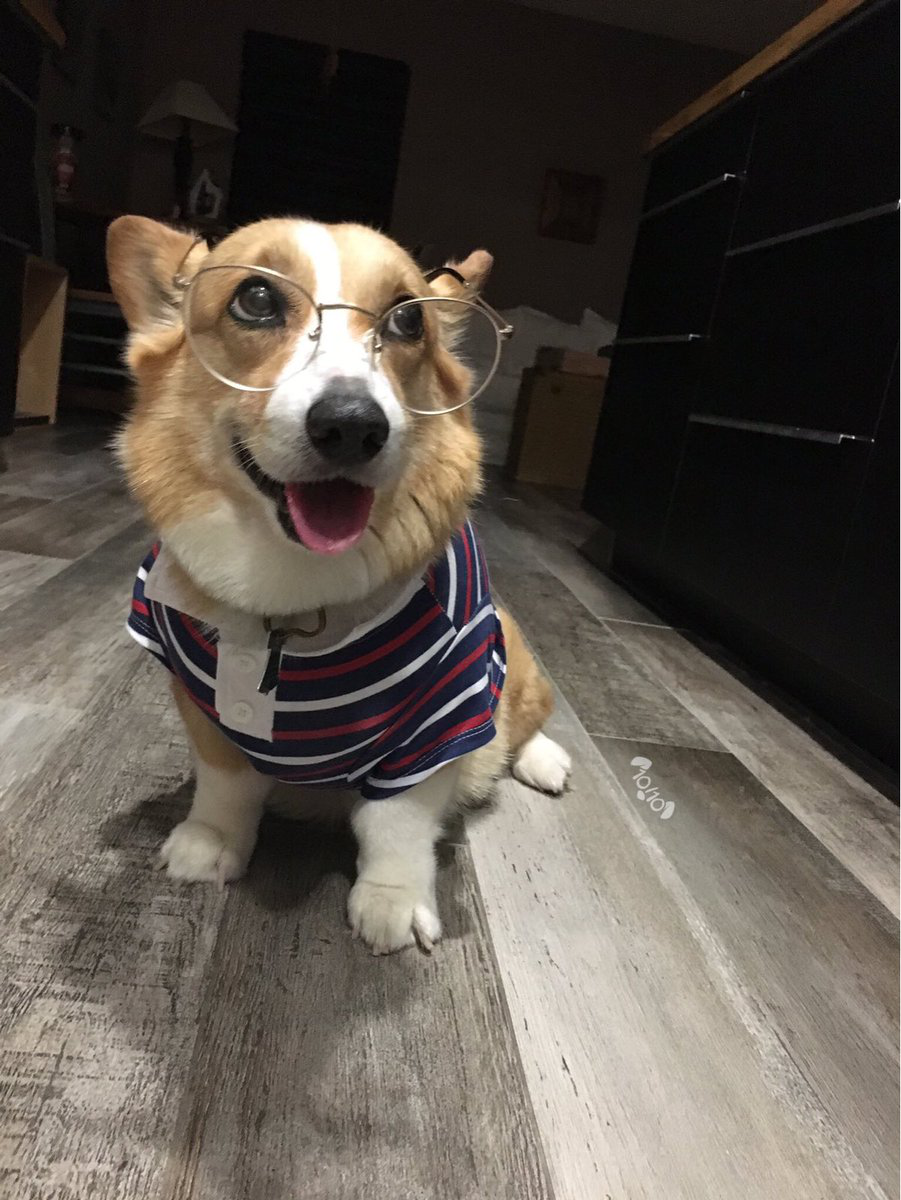

In [78]:
url = dogr.jpg_url.iloc[0]
r = requests.get(url)
Image.open(BytesIO(r.content))

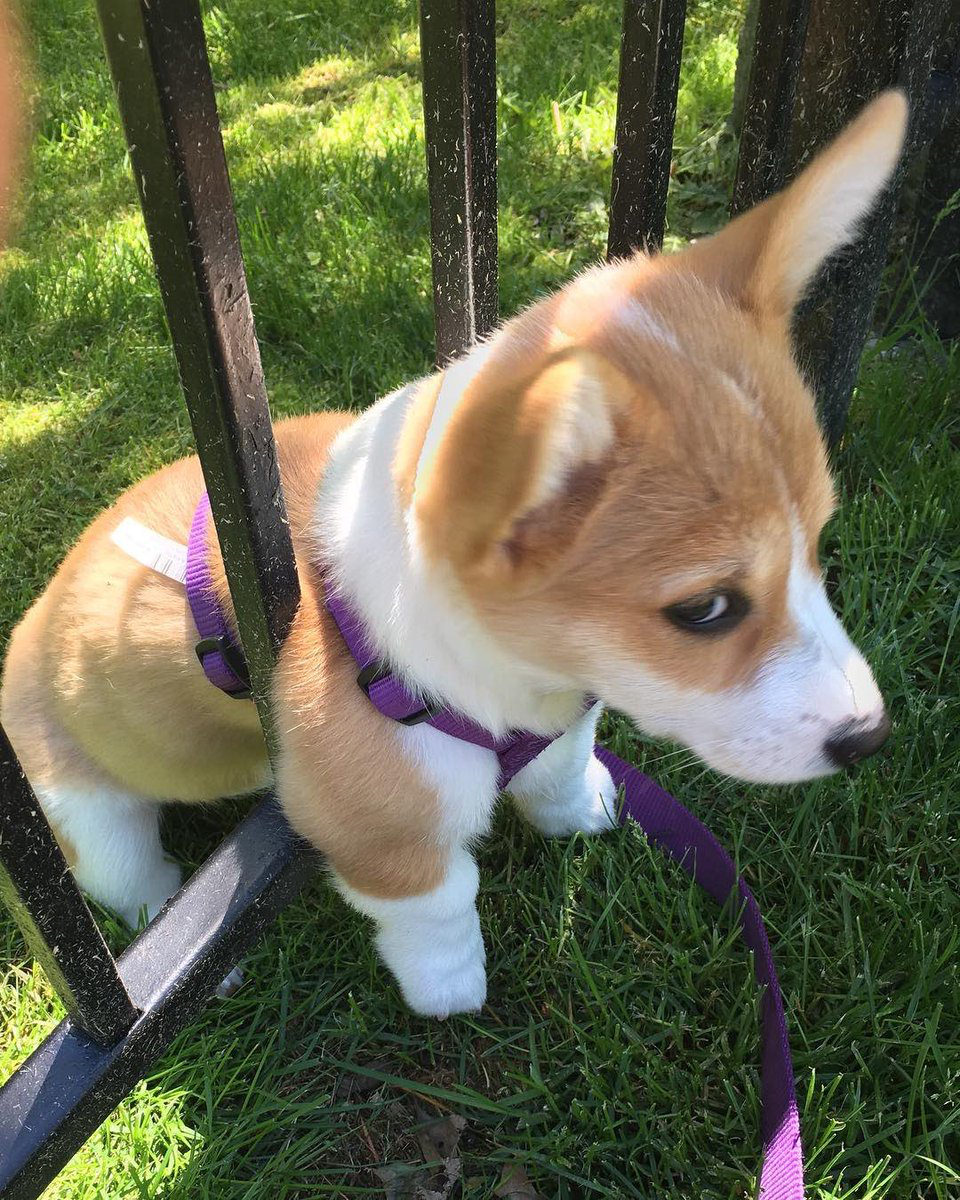

In [79]:
url = dogr.jpg_url.iloc[1]
r = requests.get(url)
Image.open(BytesIO(r.content))

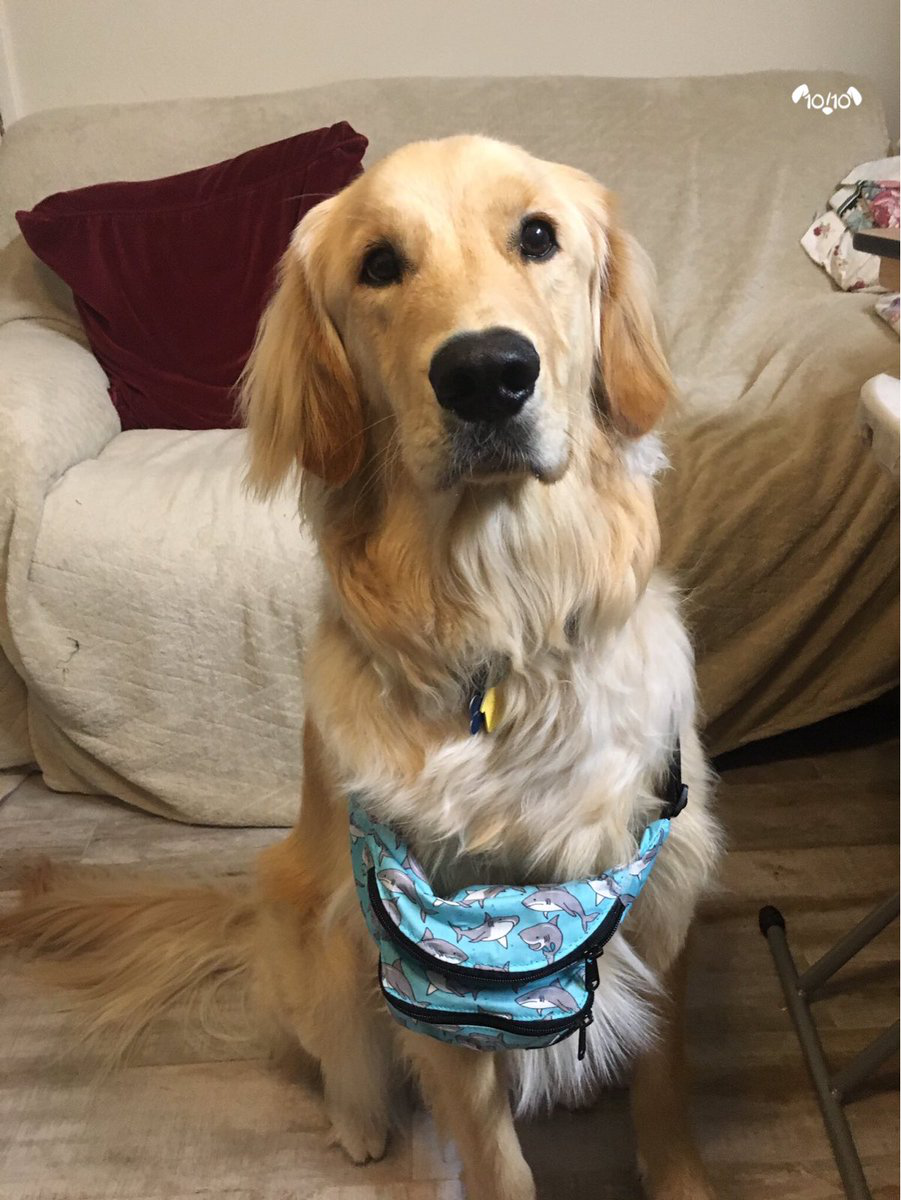

In [80]:
url = dogr.jpg_url.iloc[2]
r = requests.get(url)
Image.open(BytesIO(r.content))

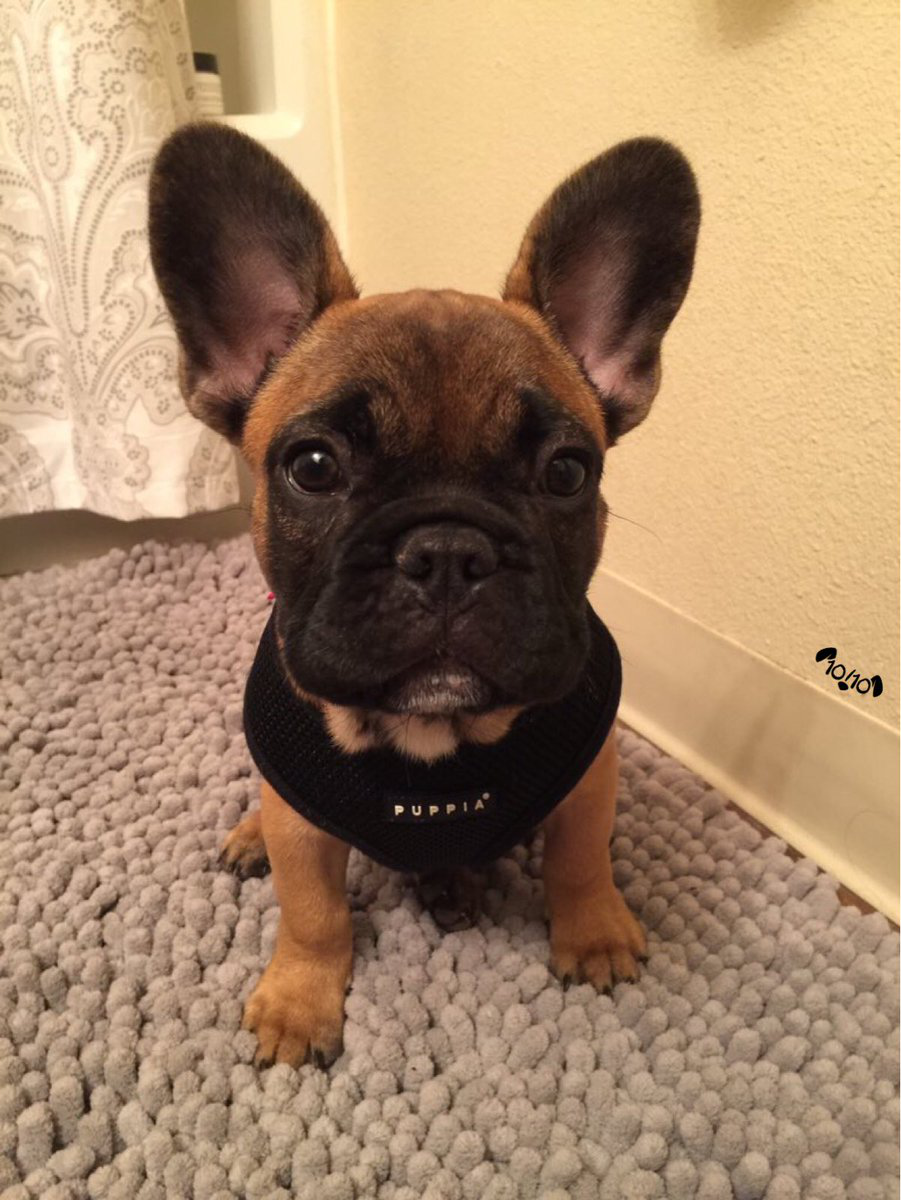

In [81]:
url = dogr.jpg_url.iloc[3]
r = requests.get(url)
Image.open(BytesIO(r.content))

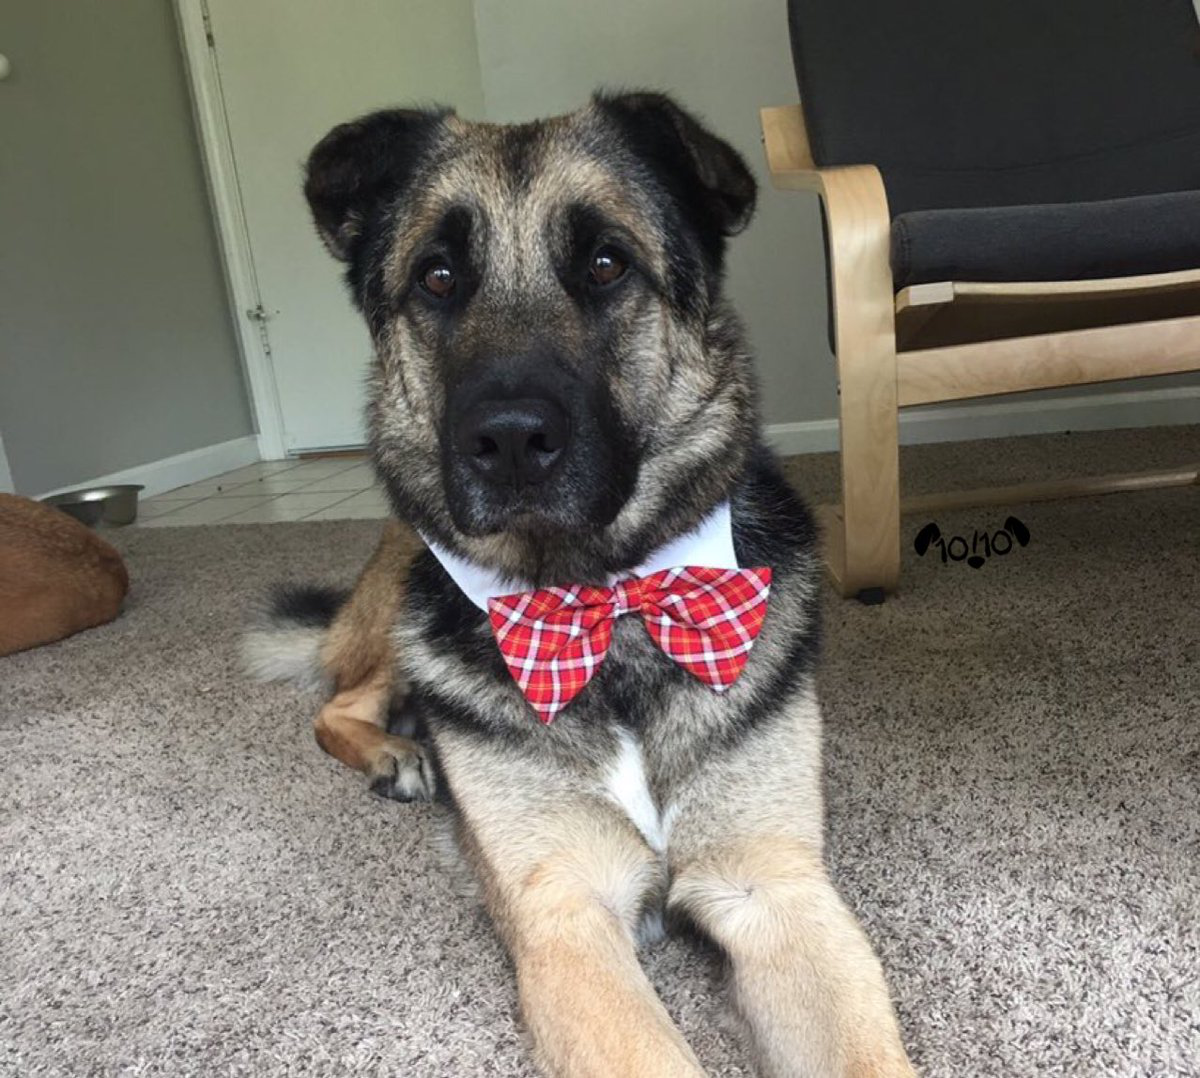

In [82]:
url = dogr.jpg_url.iloc[4]
r = requests.get(url)
Image.open(BytesIO(r.content))

These are the sample of dogs which got the highest rate (above than 10)